# BIG_MART_ANALYSIS

## CLEANING OF DATASET

### Importing library i.e. pandas and Big_Mart dataset

In [27]:
# Importing library pandas 
import pandas as pd
# Reading dataset file, which is in CSV format. Read_csv function is used to read the dataset  
df=pd.read_csv("E:\\Big_mart.csv")

### Displaying first five rows of big_mart dataset

In [28]:
# First five rows of dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Size and shape of dataset

Dataset have 8523 rows and 12 columns respectively.

Number of entities in dataset=102276 

In [29]:
# Shape of dataset
print "Shape of dataset:",df.shape
# Size of dataset
print "Size of dataset:",df.size


Shape of dataset: (8523, 12)
Size of dataset: 102276


### Description of each and every column using describe function

In [30]:
# Description of dataset
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Checking for null values in dataset

Here we found 1463 and 2410 null values in column "Item_Weight" and  "Outlet_Size" respectively.

In [31]:
# Checking for null values in dataset 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling  null values in dataset, replacing null values by appropriate data 

In [32]:
# Filling null values in column "Item_Weight" by mean value of that column 
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Filling null values in column "Outlet_Size" by mode value 
# Importing mode function from library scipy
from scipy.stats import mode

# Creating dataframe which have 1559 columns and 1 row . Row have mode value for outlet size column for each product
grp=df.pivot_table(values='Outlet_Size',columns='Item_Identifier',aggfunc=(lambda x:mode(x).mode[0]))

# Pandas series which have bool values according to whether Outlet_Size have null value or not
bool=df["Outlet_Size"].isnull()

# Filling null values in column "Outlet_Size" by mode values whcih is in grp dataframe
df.loc[bool,'Outlet_Size']=df.loc[bool,'Item_Identifier'].apply(lambda x:grp[x])

# Filling 0 with 'medium'
df['Outlet_Size']=df['Outlet_Size'].replace([0],['Medium'])

# Checking for null values in dataset
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Checking unique values in column 'Item_Fat_Content' 

In [33]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

### Replacing 'low fat', 'LF', with 'Low Fat' and 'reg' with 'Regular'

As low fat and LF have same meaning as 'Low Fat'. Similarly reg have same meaning as 'Regular'

In [34]:
# Replacing 'low fat', 'LF' with 'Low Fat' and 'reg' with 'Regular' in column 'Item_Fat_Content'
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular']) 
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### Item_Visibility have 0 values which has no practical significance so replace 0 Vlues by mean of Item_Visibility

In [99]:
mean=df['Item_Visibility'].mean()
df['Item_Visibility']=df['Item_Visibility'].replace([0.000000],[mean])

### First 10 rows of dataset after cleaning

In [100]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,6,182.0950,0,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,0,51.4008,3,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,13,57.6588,1,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,13,107.7622,5,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,5,96.9726,7,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,5,187.8214,2,2007,Medium,Tier 2,Supermarket Type1,4710.5350


# EXPLORATORY DATA ANALYSIS ON BIG_MART DATASET

### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.





![IMAGE](https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/final-grocery--cover-thumbnail-1200x1200.png)

# DATA DESCRIPTION
### Dataset is of Big Mart collected by dadtascientist for analysing Outlet sales of 1559 products by 10 different stores. Dataset have 12 features i.e columns and 8523 columns . One of the columns  is output 'Item_Outlet_sales' and other are factors which effect sales of product like MRP , Weight , fat content etc. Outlet_sales is the value which we have to predict by preparing regression model

# ATTRIBUTE INFORMATION
### Following are the input variables in dataset
1. Item_Identifier
2. Item_Weight
3. Item_Fat_Content
4. Item_Visibility
5. Item_Type
6. Item_MRP
7. Outlet_Identifier
8. Outlet_Establishment_Year
9. Outlet_size
10. Outlet_Location_Type
11. Outlet_Type
12. Item_Outlet_Sales


# UNIVARIATE ANALYSIS
### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. Univariate plots gives us the ideas of present outlliers in data and it also helps in bivariate and multivariate analysis.


## ITEM_VISIBILITY - COUNT PLOT

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


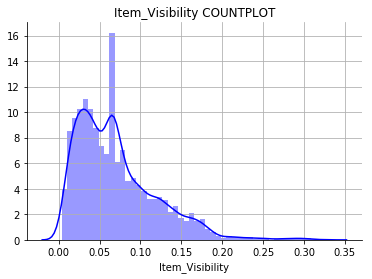

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.grid()
plt.title("Item_Visibility COUNTPLOT")
sns.distplot(df['Item_Visibility'],color='blue',hist=True)
sns.despine()

### Inferences from above plot:
#### 1. There seems to be many outliers
#### 2. Maximum number of products have visibility area b/w 0.00-0.20%
#### 3. The Distribution is skewed

## ITEM_FAT_CONTENT- COUNTPLOT

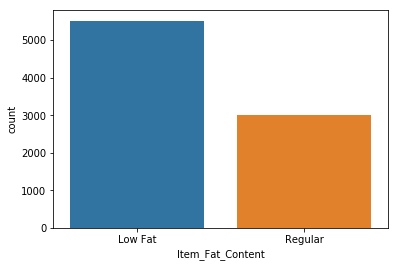

In [38]:
sns.countplot(x=df['Item_Fat_Content'],data=df)

### Inferences from above plot:
#### More number of products have Low Fat Contents as comapre to Regular fat. As people are more health conscious they consider fat contents in product while purchasing product

## ITEM_WEIGHT - COUNTPLOT

C:\ProgramData\Anaconda21\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


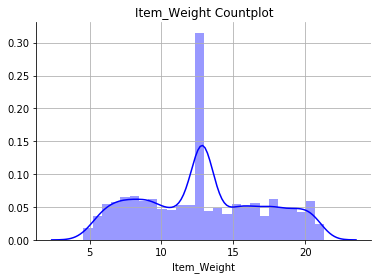

In [61]:
plt.grid()
plt.title("Item_Weight Countplot")
sns.distplot(df['Item_Weight'],color='blue',hist=True)
sns.despine()

### Inferences from above plot:
####  Maximum Product items have weight b/w 12- 14 kg approximately.
####  Skewness can be observed

## ITEM_MRP - PLOT

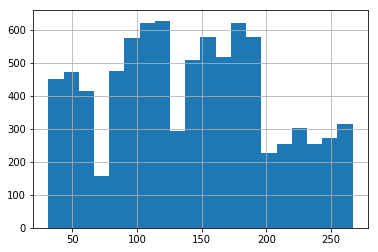

In [40]:
plt.grid()
plt.hist(x="Item_MRP",data= df,bins=20)
plt.show()

### Fowwing trends can be observed from above plot:
#### Product with high Manufactring prices i.e 200-250 are less in number
#### More number of products have price range b/w 75-200 approx.

## OUTLET_LOCATION_TYPE  - COUNTPLOT

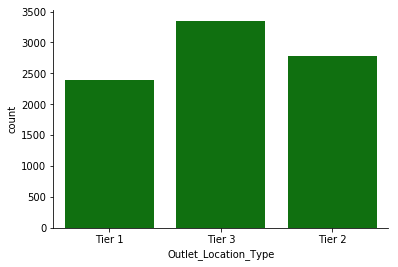

In [41]:
sns.countplot(df['Outlet_Location_Type'],color='green')
sns.despine()

### Following trends can be observed from above plot:
#### Store location effect the Item_Outlet_sales . Outlet_Stores with Location_type "Tier 3" are more in number approx 3250 stores
#### Outlet stores with location_type 'Tier 1' are less in number

## ITEM_TYPE - PIE PLOT

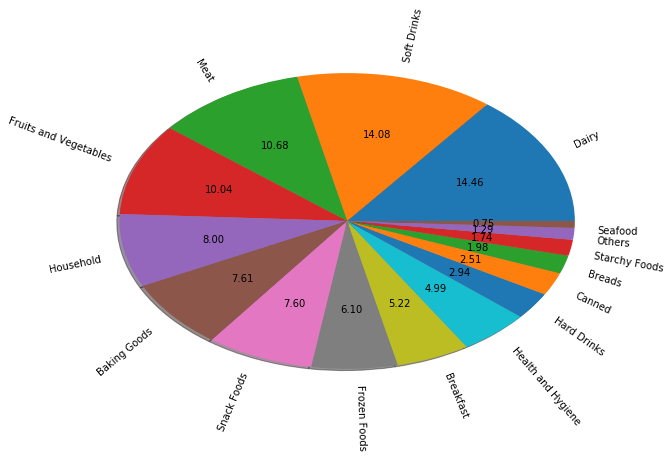

In [42]:
array=df['Item_Type'].value_counts()
labels=df['Item_Type'].unique()
plt.pie(array,labels=labels,shadow=True,radius=1.7,rotatelabels=True,autopct='%.2f')
plt.show()

### Inferences from above plot:
#### 'Seafood' ,'starch foods' , 'Canned' , 'Hard drinks' etc type of food items are less in number
#### 'Fruit and Vegetables' and 'Meat' type of product are more in number.

## BIVARIATE ANALYSIS
### Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

### CORRELATION
#### 'Correlation' refers to a mutual relationship or association b/w differnt quantites.

#### Here we calculate correlation i.e statistical parameter of dataset which gives us relatioship b/w differnt quantities.


In [43]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


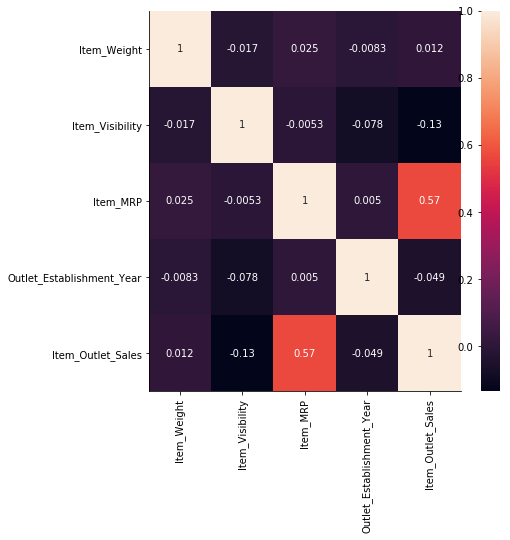

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
sns.despine()

### As we casn see from above correlation plot that our Item_Outlet_sales have high correlation with Item_MRP.  Plot the graph to see the trends b/w two variables

## ITEM_MRP Vs ITEM_OUTLET_SALES PLOT

Text(0.5,1,'Item_MRP Vs Item_Outlet_sales Plot')

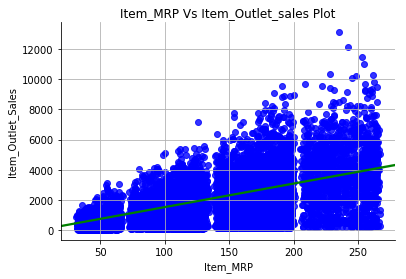

In [45]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,x_jitter=0.3,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
sns.despine()
plt.grid()
plt.title("Item_MRP Vs Item_Outlet_sales Plot")

### Following trends are observable from above plot:
#### Item_MRP and Item_Outlet_Sales have high correlation coefficient i.e. 0.56
#### Above plot shows increasing trends b/w Item_MRP And Item_Outlet_sales. Sales of product with higher MRP have high Item_Outlet_sales

## ITEM_VISIBILITY Vs ITEM_OUTLET_SALES PLOT

Text(0.5,1,'Item_Visibility Vs Item_Outlet_sales Plot')

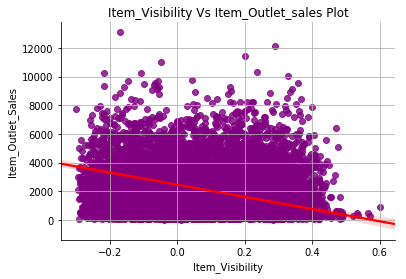

In [19]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df,x_jitter=0.3,scatter_kws={"color": "purple"}, line_kws={"color": "red"})
sns.despine()
plt.grid()
plt.title("Item_Visibility Vs Item_Outlet_sales Plot")

### Inferences from above plot:
#### Graph Shows decresing trends b/w 'Item_Visibility' and 'Item_Outlet_sales' impiles sales of product decresing by increse in visbility area of product

## OUTLET_TYPE Vs  ITEM_OUTLET_SALES

Text(0.5,1,'Outlet_Type Vs Item_Outlet_Sales Plot')

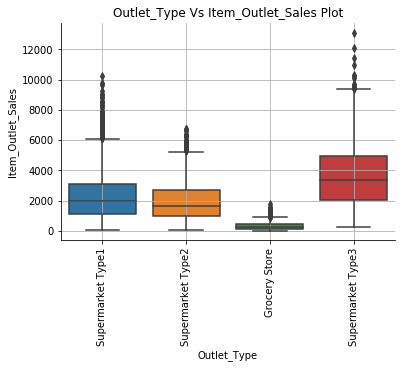

In [98]:
ax=sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.grid()
sns.despine()
plt.title("Outlet_Type Vs Item_Outlet_Sales Plot")


### Inferences from above plot:
####  Grocery Store sales is very less 
#### Supermarket type 4 have high item_outlet_sales
#### Differnce b/w sales of Supermarket Type 1 and 2 is very less


## MULTIVARIATE ANALYSIS
### Multivariate analysis is used to study more complex sets of data than what univariate analysis methods can handle.Multivariate data analysisn refers to any statistical technique used to analyze data that arises from more than one variable,and this techniques are very valuable when working with correlated variables.This type of analysis is almost always performed with software (i.e. SPSS or SAS), as working with even the smallest of data sets can be overwhelming by hand.

## ITEM_MRP Vs ITEM_OUTLET_SALES PLOT IN TERMS OF ITEM_FAT_CONTENT

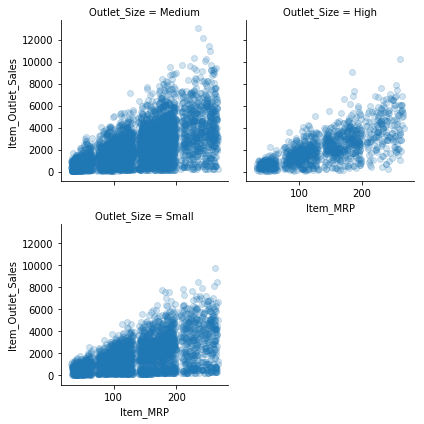

In [21]:
grid = sns.FacetGrid(df, col='Outlet_Size',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

### Inferences from above plot:
#### Medium size outlet stores have high item_outlet _sales as compared to small and high size outlet stores
#### Outlet stores with medium size are more in number in comparison to small and high size outlet stores


## ITEM_MRP Vs ITEM_OUTLET_SALES PLOT IN TERMS OF OUTLET_TYPE 

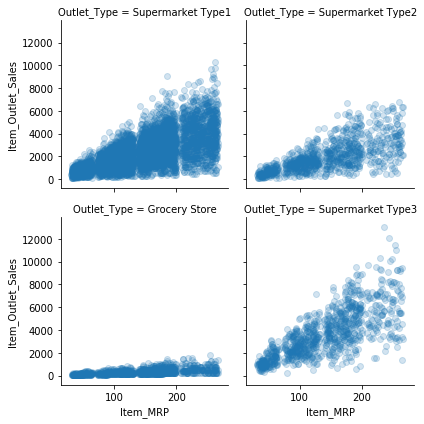

In [22]:
grid = sns.FacetGrid(df, col='Outlet_Type',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

### Trends from above plot:
#### Grocery store have very less item outlet sales in comparison to super market types
#### Super market type 3 have high item outlet sales in terms of   MRP 

## FINAL PLOT SELECTION

## ITEM_MRP Vs ITEM_OUTLET_SALES PLOT

### At purchasing time we all consider MRP of product.Its plays a important role in sales of any product item.That's why we select Item_MRP Vs Item_Outlet_Sales as final plot for conclusion

Text(0.5,1,'Item_MRP Vs Item_Outlet_sales Plot')

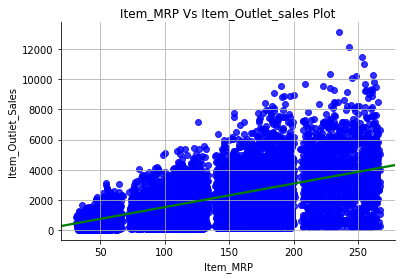

In [23]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df,x_jitter=0.3,scatter_kws={"color": "blue"}, line_kws={"color": "green"})
sns.despine()
plt.grid()
plt.title("Item_MRP Vs Item_Outlet_sales Plot")

### Inferences from above plot:
####  Item_MRP and Item_Outlet_Sales have high correlation coefficient i.e. 0.56
#### Above plot shows increasing trends b/w Item_MRP And Item_Outlet_sales. Sales of product with higher MRP have high Item_Outlet_sales

## ITEM_MRP Vs ITEM_OUTLET_SALES IN TERMS OF OUTLET_TYPE

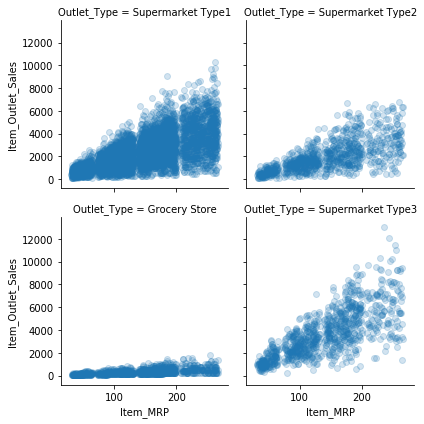

In [24]:
grid = sns.FacetGrid(df, col='Outlet_Type',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

### Inferences from above plot:
####  Grocery store have ver less item outlet sales in comparison to super market types
#### Super market type 3 have high item outlet sales

## FEATURE SELECTION

### First five rows of dataset

In [64]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Dropping unnecessary columns and converting string objects into numerical data

In [93]:
# Dropping unnecessary features 'Outlet_Identifier','Item_Identifier','Outlet_Establishment_year','Item_Type','Item_Outlet_Sales'
train=df.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Outlet_Sales','Outlet_Identifier','Item_Type'],axis=1)

# Converting String objects into numerical data by using get_dummies
train=pd.get_dummies(train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

# Separating target ie output variables 'Item_Outlet_Sales'
label=df['Item_Outlet_Sales']

# Drop column 'Item_Fat_Content_Regular'
train=train.drop(['Item_Fat_Content_Regular'],axis=1)

# Display first five rows of dataset after dropping and using get_dummmies
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,0,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,1,1,0,0,0,0,1,0,1,0,0


## MODEL PREPARATION

In [67]:
# Importing LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Importing train_test_split function from sklearn.cross_validation
from sklearn.cross_validation import train_test_split

## LINEAR REGRESSION MODEL

In [94]:
x_train , x_test , y_train , y_test = train_test_split(train , label , test_size=0.30 , random_state=50)
reg=LinearRegression()

import time
start=time.time()

#Fitting training data into model
reg.fit(x_train,y_train)
end=time.time()
print "Time to train model=", end-start

# Score of LinarRegression model
print "Score of LinearRegression model=",reg.score(x_test,y_test)

Time to train model= 0.00600004196167
Score of LinearRegression model= 0.563761572664107


## GRADIENT BOOSTING REGRESSOR MODEL

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
boost=GradientBoostingRegressor()
start=time.time()

# Fitting trainingd data into model
boost.fit(x_train,y_train)
end=time.time()
print "Time to train model",end-start

# Score of Gradient Boosting Regressor model
print "Score of Gradient Boosting Regressor Model",boost.score(x_test,y_test)

Time to train model 0.59500002861
Score of Gradient Boosting Regressor Model 0.6005676901294019


## RANDOM FOREST REGRESSOR MODEL

In [103]:
from sklearn.ensemble import RandomForestRegressor
tree=RandomForestRegressor(n_estimators=30,random_state=3)
start=time.time()

# Fitting the training data into model
tree.fit(x_train,y_train)
end=time.time()
print 'Time to train model',end-start

print "Score of Random Forest Regressor Model=",tree.score(x_test,y_test)

Time to train model 1.24000000954
Score of Random Forest Regressor Model= 0.5418674100301114


## CONCLUSION:
### Gradient boosting regressor model performs better in predicting Item_Outlet_Sales in Big mart dataset with accuracy score of 60% but takes a little more time in training as compared to linear regression model which gives accuracy score of around 56%

### Random Forest regressor takes a more time in training and gives less accuracy in comparison to other two models 